In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
cd ..

/scratch/rd804/m-anode


In [3]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [4]:

#wandb_group = 'nflows_lhco_w_train'
#wandb_job_type = 'joint_0.01'
wandb_group = 'nflows_lhco'
wandb_job_type = 'joint_pdata'

wandb_job_type_no_signal = 'no_signal_fit'


#ntries = 4
nensembles = 20
#sig_list = [1000,500,300,225,75]
#true_w = [0.006037,0.00299,0.00185,0.0014,0.00044]
#true_w_std = [0.00002,0.00004,0.00004,0.00004,0.00003]
sig_list = [1000,600,500,450,300,225,150,75,0]
true_w = [0.006037,0.00368,0.003072,0.002794,0.001851,0.001387,0.000914,0.00044,0]
#true_w_std = [0.00002,0.00003,0.00003,0,0,0]

#w_mean = []
#w_std = []
w_sig = []
w_sig_84_percentile = []
w_sig_16_percentile = []    

w_all_list = {}

w_all_try_sig = {}

for k,sig in enumerate(sig_list):
  #  w_sig = []
 #   w_std = []
    w_all = []
    w_try = []
   # w_std = []
    w_std = []

    w_all_list[sig] = []
    w_all_try_sig[sig] = {}

    for i in range(10):
        w_all_try_sig[sig][i] = []

        if sig == 0:
            if i!=0:
                continue
        w_ensemble = []
        for j in range(0,nensembles,1):

            if not sig == 0:
                wandb_job = f'{wandb_job_type}_{sig}'
            else:
                wandb_job = f'{wandb_job_type_no_signal}'
                if i!=0:
                    continue

            wandb_run_name = f'try_{i}_{j}'
            path = f'./results/{wandb_group}/{wandb_job}/{wandb_run_name}'

            if not os.path.exists(f'{path}/valloss.npy'):
                continue
            valloss = np.load(f'{path}/valloss.npy')
            lowest_epoch = np.argsort(valloss)[0:10]

            for epoch in lowest_epoch:
                w_ = np.load(f'{path}/w_{epoch}.npy')
                w_ensemble.append(w_)
                w_all.append(w_)

                w_all_try_sig[sig][i].append(w_)
        #w_try = np.array(w_try)
   #     print(w_try)
       # w_sig.append(np.mean(w_try, axis=0))
       # w_std.append(np.std(w_try, axis=0))
       # w_sig.append(np.mean(w_ensemble, axis=0))
        
     #   w_all_list[sig].append(w_all)
       # w_try.append(np.mean(w_all_list[sig], axis=0))
    w_all = np.array(w_all)

    w_all_list[sig] = w_all
   # w_all = w_all[w_all>0.0001]



   # plt.hist(w_all, bins=50, label='learned w', histtype='step')
   # plt.axvline(x=true_w[k], color='r', linestyle='--', label='true w')
   # plt.legend(frameon=False)
   # plt.title(f'Nsig = {sig}')
   # plt.savefig(f'./results/w_hist_{sig}.pdf')
   # plt.show()

       # w_try.append(np.mean(np.array(w_ensemble)[np.array(w_ensemble)>0.0001], axis=0))
    w_sig.append(np.median(w_all, axis=0))
   # w_sig.append(np.mean(w_all, axis=0))
   # w_std.append(np.std(w_all, axis=0))

    w_sig_84_percentile.append(np.percentile(w_all, 84, axis=0))
   # w_sig_84_percentile.append(np.percentile(w_all, 84, axis=0))
    w_sig_16_percentile.append(np.percentile(w_all, 16, axis=0))
   # w_sig.append(np.mean(w_try, axis=0))
   # w_sig_std.append(np.std(w_try, axis=0))
       # w_std.append(np.std(w_try, axis=0))
       # print(w_all)
      #  print(w_try)
      #  w_all = np.array(w_all)
       # w_std = np.std(w_all)
       # w_all = np.array(w_all)

      #  plt.hist(np.array(w_all)[np.array(w_all)>0.00001], bins=50, label='learned w', histtype='step')
     #   plt.axvline(x=true_w[k], color='r', linestyle='--', label='true w')
      #  if sig == 75:
      #      mean = np.mean(w_all)
      #      std = np.std(w_all)
           # plt.axvline(x=mean+std, color='b', linestyle='--')
      #  plt.legend(frameon=False)
     #   plt.title(f'Nsig = {sig}')
     #   plt.savefig(f'./results/w_hist_{sig}.pdf')
     #   plt.show()

w_sig = np.array(w_sig)
#w_std = np.array(w_std)
#w_sig_16_percentile = w_sig - w_std
#w_sig_84_percentile = w_sig + w_std
w_sig_84_percentile = np.array(w_sig_84_percentile)
w_sig_16_percentile = np.array(w_sig_16_percentile)
#w_sig_std = np.array(w_sig_std)

   # w_mean.append(np.mean(w_all[w_all>0.00001], axis=0))
   # w_std.append(np.std(w_all[w_all>0.00001], axis=0))

   # w_std = np.array(w_std)
   # w_std = np.std(w_all, axis=0)
   # print(w_sig)
   # print(w_std)
    #print(np.mean(w_sig, axis=0))
    #print(w_std)
   # print(w_sig)
#    print(w_std)
#print(w_mean)
#print(w_std)
  #  print( np.mean(w_sig, axis=0))
  #  print( np.std(w_sig, axis=0))


In [5]:
cuts = {}

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
# import norm pdf
from scipy.stats import norm
from sklearn.cluster import DBSCAN
import matplotlib.backends.backend_pdf


#bins = np.linspace(0.000000001,0.01,1000)
bins = np.linspace(0.0001,0.01,50)
#bins = np.logspace(-10,-3, 100)
wsig_0 = w_all_try_sig[0][0]
wsig_0 = np.array(wsig_0)
wsig_log_0 = -np.log10(wsig_0)

#print(wsig_log_0.shape)


new_sig_list = [1000,600,500,450,300,225,150,75,0]

for sig in sig_list:
    
    w_dataset = []

   # if sig != 1000:
    #    continue
    if sig == 1000:
       cuts[sig] = 10**(-np.array([2.7,2.7,2.7,2.7,2.7,2.7,2.7,
                                   2.7,2.7,2.7]))
      #cuts[sig] = [0.0038,0.0032,0.003,0.003,0.0035,0.0038,
               #  0.004,0.003, 0.0036, 0.003]
    if sig == 600:
      cuts[sig] = 10**(-np.array([3.0,3.6,3.6,3.0,3.0,3.0,3.0,
                                  3.0,3.5,3.5 ]))
    if sig == 500:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
    if sig == 450:
      cuts[sig] = 10**(-np.array([3.3,3.3,3.3,3.3,3.3,3.3,3.3,
                                  3.3,3.3,4.0]))
    if sig == 300:
      cuts[sig] = 10**(-np.array([3.7,3.7,3.7,3.7,3.7,3.7,3.7,
                                  3.7,3.7,3.7 ]))
    if sig == 225:
      cuts[sig] = 10**(-np.array([4.0,4.0,4.0,4.0,4.0,4.0,4.0,
                                  4.0,4.0,4.0 ]))
    if sig == 150:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
    if sig == 75:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
      
    if sig == 0:
       cuts[sig] = 10**(-np.array([4.2]))
    #if sig == 225:
    #  cuts[sig] = 10**(-np.array([4.1,4.1,4.1,4.1,4.1,4.1,4.1,
       #                           4.1,4.1,4.1 ]))
    pdf = matplotlib.backends.backend_pdf.PdfPages(f'./figures/m_data/w_hist_{sig}.pdf')
    for i in range(10):
        if sig ==0:
            if i!=0:
                continue
        wsig = w_all_try_sig[sig][i]
        wsig = np.array(wsig)

        wsig_log = -np.log10(wsig)


        # do a dbscan
       # db = DBSCAN(eps=0.3, min_samples=20).fit(wsig_log.reshape(-1,1))
       # labels = db.labels_

       # print(labels)
      #  clusters = np.unique(labels)

       # means = [np.mean(wsig[labels==cluster]) for cluster in clusters]
       # number_of_points = [len(wsig[labels==cluster]) for cluster in clusters]

       # max_mean = np.argmax(number_of_points)
       # max_mean_label = clusters[max_mean]

       # print(max_mean)


       # fraction = len(wsig[wsig>cuts[sig][i]])/len(wsig)
       # print(fraction)

       # print(wsig.shape)
        #print
      #  w_mean = []
       # for i in range(20):
        #    print((i+1)*10)
         #   w_mean.append(np.mean(wsig[i*10:i*10+1]))
        #wsig = wsig[wsig<0.0001]


      #  gmm = GaussianMixture(n_components=2, random_state=0).fit(wsig.reshape(-1,1))

       # means = np.array(gmm.means_).flatten()
       # cov = np.sqrt(gmm.covariances_).flatten()
       # weights = np.array(gmm.weights_).flatten()

       # pdf = weights[0]*norm.pdf(bins, means[0], cov[0]) + weights[1]*norm.pdf(bins, means[1], cov[1])


        #print(gmm.weights_)
       # print(means)

       # sample_0 = np.random.normal(means[0], cov[0], 50000)
       # sample_1 = np.random.normal(means[1], cov[1], 50000)
      #  kmeans = AffinityPropagation(max_iter=5000).fit(wsig.reshape(-1,1))

       # kmeans = KMeans(n_clusters=2, random_state=0).fit(wsig_log.reshape(-1,1))
       # labels = kmeans.labels_

       # centroids = kmeans.cluster_centers_
       # label = np.argmin(centroids)
        #print(centroids)

       # w_dataset.append(np.median(wsig[labels==0]))

       # print(np.unique(labels))
       # print(labels)

       # labels_1 = np.sum(labels)
       # labels_0 = len(labels) - labels_1

       # fraction = labels_1/len(labels)

       # if (fraction < 0.53) and (fraction > 0.47):
         #   print('unsuccessful trainings')
         #   continue


       # if labels_0 > labels_1:
         #   labels = 1 - labels

       # print(labels_1, labels_0)
       # print(kmeans.cluster_centers_)
      #  label = np.argmax(kmeans.cluster_centers_)

       # print(metrics.davies_bouldin_score(wsig.reshape(-1,1), labels))
        bins = np.linspace(-9,-2,60)
        if sig == 0:        
           plt.hist(-wsig_log_0, bins=bins, label='learned w', histtype='step')

        else:   
          plt.hist(-wsig_log, bins=bins, label='learned w', histtype='step')
      #    plt.hist(-wsig_log_0, bins=bins, label='no-signal', histtype='stepfilled',alpha=0.5,color='C1')
     #   plt.hist(wsig_log[labels==label], bins=40, label='learned w', histtype='step')
       # plt.hist(wsig, bins=40, label='learned w', histtype='step')
       # plt.xscale('log')
       # plt.plot(bins, pdf, label='GMM')
        #plt.hist(sample_0, bins=40, label='gaussian_1', histtype='step',density=True)
       #plt.hist(sample_1, bins=40, label='gaussian_2', histtype='step',density=True)
       # plt.hist(wsig[labels==0], bins=40, label='learned w', histtype='step')
      #  plt.title(f'w = {np.median(wsig[labels==0])}')
        plt.title(f'Nsig = {sig}',fontsize=15)
       # plt.ylabel('',fontsize=15)
        plt.xlabel(r'$\log_{10}(w)$',fontsize=15)
        #plt.axvline(x=), color='r', linestyle='--', label='true w')

        plt.axvline(x=np.log10(cuts[sig][i]), color='r', linestyle='--', label='cut')
        plt.legend(frameon=False,fontsize=15)
       # plt.savefig(f'./results/w_hist_{sig}_dataset_{i}.pdf')
        pdf.savefig()
        plt.close()
    pdf.close()

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
# import norm pdf
from scipy.stats import norm
from sklearn.cluster import DBSCAN
import matplotlib.backends.backend_pdf


#bins = np.linspace(0.000000001,0.01,1000)
bins = np.linspace(0.0001,0.01,50)
#bins = np.logspace(-10,-3, 100)
wsig_0 = w_all_try_sig[0][0]
wsig_0 = np.array(wsig_0)
wsig_log_0 = -np.log10(wsig_0)

#print(wsig_log_0.shape)


new_sig_list = [1000,600,500,450,300,225,150,75,0]

for sig in sig_list:
    
    w_dataset = []

   # if sig != 1000:
    #    continue
    if sig == 1000:
       cuts[sig] = 10**(-np.array([2.7,2.7,2.7,2.7,2.7,2.7,2.7,
                                   2.7,2.7,2.7]))
      #cuts[sig] = [0.0038,0.0032,0.003,0.003,0.0035,0.0038,
               #  0.004,0.003, 0.0036, 0.003]
    if sig == 600:
      cuts[sig] = 10**(-np.array([3.0,3.6,3.6,3.0,3.0,3.0,3.0,
                                  3.0,3.5,3.5 ]))
    if sig == 500:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
    if sig == 450:
      cuts[sig] = 10**(-np.array([3.3,3.3,3.3,3.3,3.3,3.3,3.3,
                                  3.3,3.3,4.0]))
    if sig == 300:
      cuts[sig] = 10**(-np.array([3.7,3.7,3.7,3.7,3.7,3.7,3.7,
                                  3.7,3.7,3.7 ]))
    if sig == 225:
      cuts[sig] = 10**(-np.array([4.0,4.0,4.0,4.0,4.0,4.0,4.0,
                                  4.0,4.0,4.0 ]))
    if sig == 150:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
    if sig == 75:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
      
    if sig == 0:
       cuts[sig] = 10**(-np.array([4.2]))
    #if sig == 225:
    #  cuts[sig] = 10**(-np.array([4.1,4.1,4.1,4.1,4.1,4.1,4.1,
       #                           4.1,4.1,4.1 ]))
    pdf = matplotlib.backends.backend_pdf.PdfPages(f'./figures/m_data/w_hist_cut_{sig}.pdf')
    for i in range(10):
        if sig ==0:
            if i!=0:
                continue
        wsig = w_all_try_sig[sig][i]
        wsig = np.array(wsig)

        wsig_log = -np.log10(wsig)



       # print(metrics.davies_bouldin_score(wsig.reshape(-1,1), labels))
        bins = np.linspace(-4.2,-2,40)
        if sig == 0:        
           plt.hist(-wsig_log_0, bins=bins, label='no-signal', histtype='stepfilled',color='C1')

        else:   
          plt.hist(-wsig_log, bins=bins, label='learned w', histtype='step')
          plt.hist(-wsig_log_0, bins=bins, label='no-signal', histtype='stepfilled',alpha=0.5,color='C1')
     #   plt.hist(wsig_log[labels==label], bins=40, label='learned w', histtype='step')
       # plt.hist(wsig, bins=40, label='learned w', histtype='step')
       # plt.xscale('log')
       # plt.plot(bins, pdf, label='GMM')
        #plt.hist(sample_0, bins=40, label='gaussian_1', histtype='step',density=True)
       #plt.hist(sample_1, bins=40, label='gaussian_2', histtype='step',density=True)
       # plt.hist(wsig[labels==0], bins=40, label='learned w', histtype='step')
      #  plt.title(f'w = {np.median(wsig[labels==0])}')
        plt.title(f'Nsig = {sig}',fontsize=15)
       # plt.ylabel('',fontsize=15)
        plt.xlabel(r'$\log_{10}(w)$',fontsize=15)
        #plt.axvline(x=), color='r', linestyle='--', label='true w')

       # plt.axvline(x=np.log10(cuts[sig][i]), color='r', linestyle='--', label='cut')
        plt.legend(frameon=False,fontsize=15)
       # plt.savefig(f'./results/w_hist_{sig}_dataset_{i}.pdf')
        pdf.savefig()
        plt.close()
    pdf.close()

In [24]:
print(w_sig_try[0])
print(w_sig_try_16_percentile[0], w_sig_try_84_percentile[0])


0.001096719824922214
0.001096719824922214 0.001096719824922214


In [23]:
len(wsig_0)

180

In [132]:
import matplotlib.backends.backend_pdf

(40,)
(24,)
(30,)
(29,)
(24,)


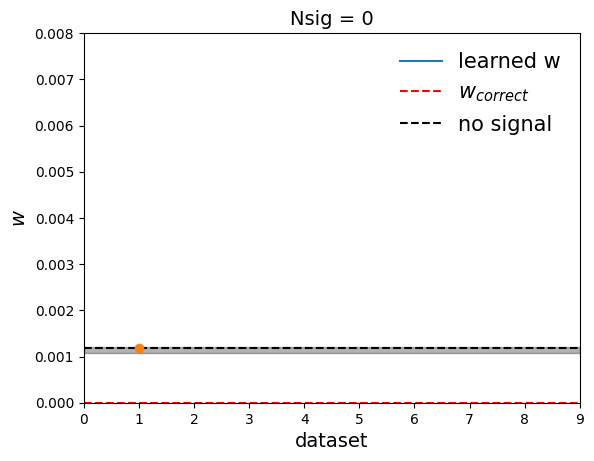

(40,)
(20,)
(20,)
(30,)
(40,)
(40,)
(20,)
(20,)
(27,)
(30,)
(40,)
(20,)
(20,)
(30,)
(40,)
(32,)
(20,)
(31,)
(20,)
(30,)
(31,)
(20,)
(20,)
(40,)
(40,)
(30,)
(20,)
(30,)
(21,)
(40,)
(40,)
(20,)
(30,)
(20,)
(40,)
(30,)
(30,)
(20,)
(30,)
(30,)
(40,)
(30,)
(30,)
(30,)
(40,)
(40,)
(20,)
(30,)
(20,)
(30,)


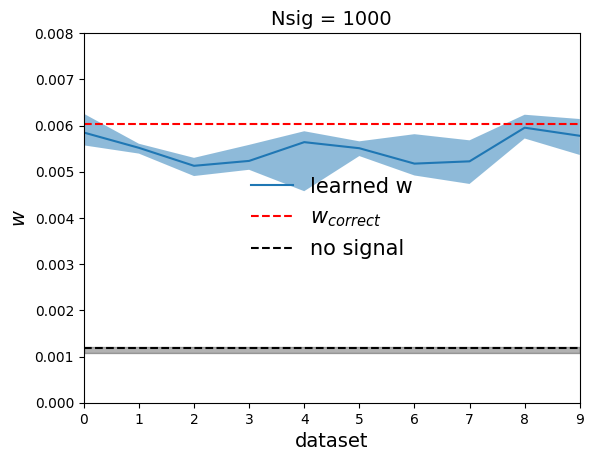

(13,)
(20,)
(25,)
(14,)
(31,)
(35,)
(27,)
(40,)
(12,)
(40,)
(40,)
(22,)
(20,)
(20,)
(30,)
(33,)
(13,)
(20,)
(20,)
(40,)
(14,)
(20,)
(21,)
(20,)
(33,)
(40,)
(20,)
(30,)
(20,)
(31,)
(31,)
(20,)
(22,)
(33,)
(40,)
(24,)
(20,)
(20,)
(20,)
(30,)
(25,)
(21,)
(40,)
(28,)
(40,)
(40,)
(20,)
(20,)
(26,)
(22,)


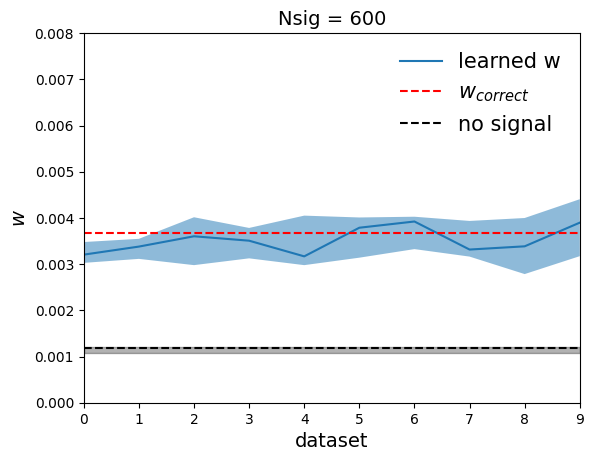

(35,)
(20,)
(30,)
(28,)
(38,)
(40,)
(20,)
(30,)
(20,)
(40,)
(40,)
(20,)
(32,)
(40,)
(40,)
(40,)
(22,)
(39,)
(20,)
(30,)
(38,)
(20,)
(21,)
(30,)
(40,)
(40,)
(23,)
(30,)
(23,)
(40,)
(40,)
(30,)
(22,)
(21,)
(31,)
(40,)
(20,)
(22,)
(21,)
(40,)
(36,)
(20,)
(32,)
(30,)
(31,)
(40,)
(20,)
(31,)
(14,)
(35,)


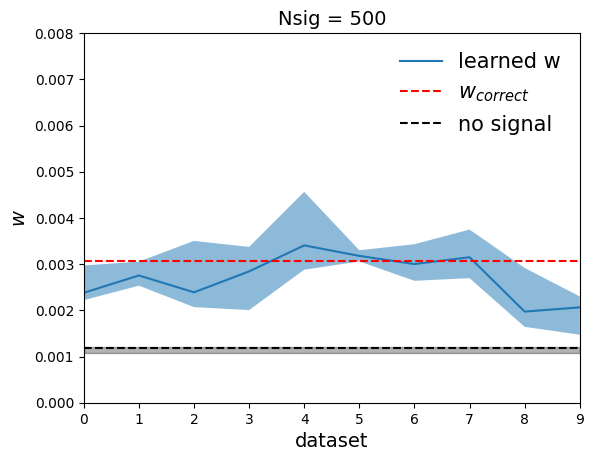

(40,)
(20,)
(25,)
(16,)
(40,)
(31,)
(20,)
(23,)
(24,)
(30,)
(34,)
(20,)
(27,)
(23,)
(39,)
(31,)
(15,)
(24,)
(24,)
(30,)
(40,)
(20,)
(21,)
(31,)
(30,)
(38,)
(28,)
(23,)
(22,)
(40,)
(30,)
(20,)
(25,)
(22,)
(40,)
(33,)
(23,)
(24,)
(29,)
(40,)
(27,)
(20,)
(18,)
(27,)
(30,)
(40,)
(20,)
(30,)
(21,)
(31,)


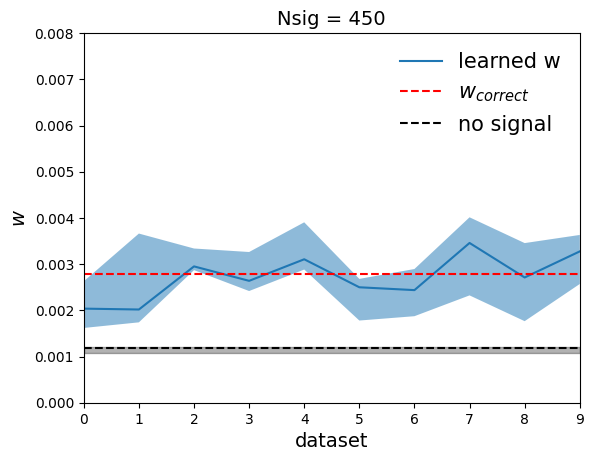

(40,)
(24,)
(30,)
(34,)
(35,)
(32,)
(25,)
(29,)
(18,)
(23,)
(40,)
(20,)
(20,)
(20,)
(35,)
(32,)
(20,)
(28,)
(23,)
(39,)
(40,)
(20,)
(23,)
(29,)
(40,)
(40,)
(20,)
(20,)
(29,)
(30,)
(31,)
(20,)
(28,)
(27,)
(31,)
(39,)
(20,)
(24,)
(26,)
(40,)
(40,)
(20,)
(24,)
(20,)
(40,)
(40,)
(20,)
(20,)
(28,)
(31,)


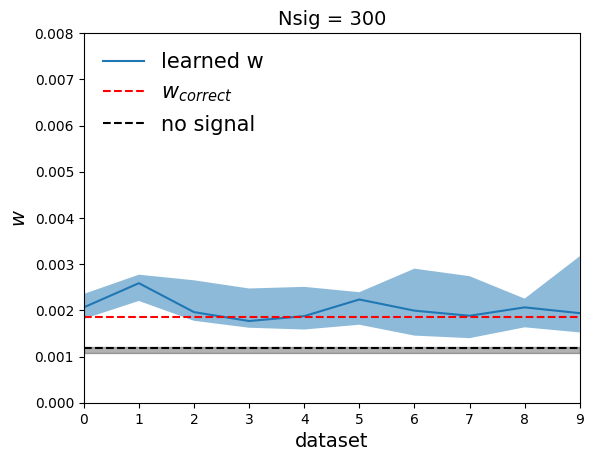

(40,)
(19,)
(29,)
(39,)
(36,)
(40,)
(29,)
(28,)
(29,)
(30,)
(30,)
(26,)
(32,)
(21,)
(30,)
(40,)
(22,)
(20,)
(36,)
(40,)
(40,)
(20,)
(34,)
(21,)
(37,)
(40,)
(25,)
(39,)
(28,)
(40,)
(40,)
(31,)
(20,)
(20,)
(40,)
(31,)
(21,)
(24,)
(19,)
(36,)
(40,)
(25,)
(31,)
(29,)
(40,)
(39,)
(20,)
(36,)
(30,)
(33,)


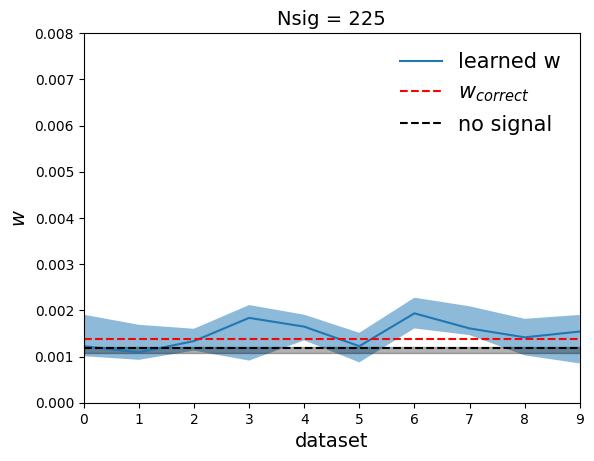

(35,)
(22,)
(29,)
(22,)
(30,)
(39,)
(20,)
(38,)
(23,)
(27,)
(36,)
(23,)
(39,)
(21,)
(40,)
(28,)
(20,)
(31,)
(33,)
(37,)
(28,)
(20,)
(29,)
(35,)
(38,)
(40,)
(25,)
(40,)
(30,)
(40,)
(30,)
(20,)
(20,)
(22,)
(40,)
(27,)
(21,)
(30,)
(27,)
(30,)
(29,)
(20,)
(22,)
(16,)
(34,)
(30,)
(30,)
(22,)
(20,)
(40,)


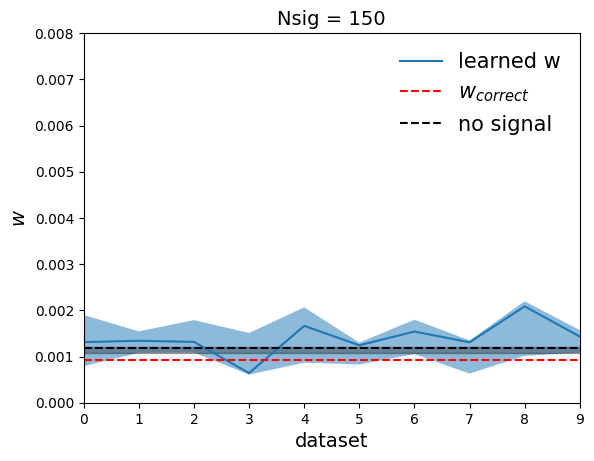

(36,)
(11,)
(22,)
(27,)
(39,)
(36,)
(20,)
(24,)
(22,)
(35,)
(37,)
(22,)
(30,)
(35,)
(36,)
(40,)
(21,)
(28,)
(30,)
(38,)
(35,)
(21,)
(27,)
(20,)
(38,)
(40,)
(20,)
(24,)
(30,)
(38,)
(38,)
(20,)
(25,)
(16,)
(40,)
(39,)
(25,)
(25,)
(16,)
(40,)
(39,)
(22,)
(22,)
(27,)
(39,)
(40,)
(20,)
(20,)
(20,)
(40,)


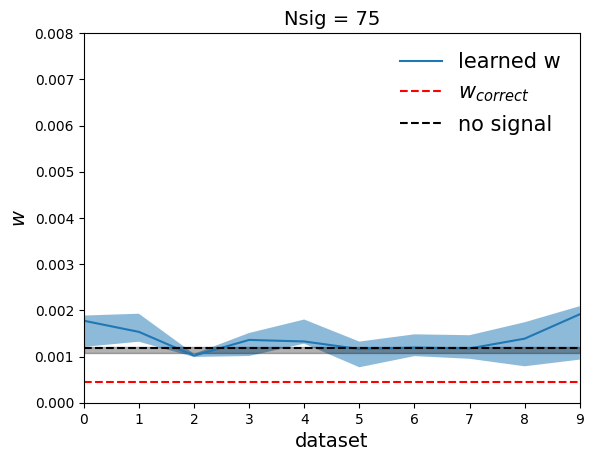

In [8]:
all_ws = w_all_try_sig[0][0]
all_ws = np.array(all_ws)

#all_ws = all_ws[all_ws>0.0001]
#w_sig_try_0 = 0.0009
#w_sig_try_16_0 = 0.00036
#w_sig_try_84_0 = 0.0014
#w_sig_std_try = []
#new_sig_list = [0,1000,600]
new_true_w = [0,0.006037,0.00368,0.003072,0.002794,0.001851,0.001387,0.000914,0.00044]

new_sig_list = [0,1000,600,500,450,300,225,150,75]

w_sig_ensembled_median = []
w_sig_ensembled_16_percentile = []
w_sig_ensembled_84_percentile = []

#pdf = matplotlib.backends.backend_pdf.PdfPages(f'./results/w_bounds.pdf')

for k,sig in enumerate(new_sig_list):
    w_sig_try = []
    w_sig_try_16_percentile = []
    w_sig_try_84_percentile = []
    for i in range(10):
        if sig == 0:
            if i!=0:
                continue
        all_ws = w_all_try_sig[sig][i]
        all_ws = np.array(all_ws)
      #  print(all_ws.shape)

        w_ensembled = [] 
        for j in range(5):
            ws_cut = all_ws[j*40:(j+1)*40]
            ws_cut = ws_cut[ws_cut>cuts[sig][i]]

            print(ws_cut.shape)
            if len(ws_cut) == 0:
                continue
            else:
                w_ensembled.append(np.mean(ws_cut))

        all_ws = np.array(w_ensembled)
       # print(all_ws.shape)

        # all_ws = all_ws[all_ws>cuts[sig][i]]
       # all_ws_log = -np.log10(all_ws)

        # do a dbscan
       # db = DBSCAN(eps=0.5, min_samples=30).fit(all_ws_log.reshape(-1,1))
       # labels = db.labels_

       # clusters = np.unique(labels)
       # means = [np.mean(all_ws[labels==cluster]) for cluster in clusters]
       # number_of_points = [len(all_ws[labels==cluster]) for cluster in clusters]

       # max_mean = np.argmax(number_of_points)
       # max_mean_label = clusters[max_mean]

        

       # kmeans = KMeans(n_clusters=2, random_state=0).fit(all_ws_log.reshape(-1,1))


       # all_ws = all_ws[all_ws>cuts[sig][i]]
        w_sig_try.append(np.median(all_ws))
        w_sig_try_16_percentile.append(np.percentile(all_ws, 16))
        w_sig_try_84_percentile.append(np.percentile(all_ws, 84))
     #   w_sig_std_try.append(np.std(w_all_try_sig[1000][i]))

    w_sig_try = np.array(w_sig_try)
    w_sig_try_16_percentile = np.array(w_sig_try_16_percentile)
    w_sig_try_84_percentile = np.array(w_sig_try_84_percentile)

    if sig == 0:
        w_sig_try_0 = w_sig_try
        w_sig_try_16_0 = w_sig_try_16_percentile
        w_sig_try_84_0 = w_sig_try_84_percentile

    w_sig_ensembled_median.append(np.median(w_sig_try))
    w_sig_ensembled_16_percentile.append(np.percentile(w_sig_try, 16))
    w_sig_ensembled_84_percentile.append(np.percentile(w_sig_try, 84))
   # w_sig_std_try = np.array(w_sig_std_try)

    if sig != 0:
        plt.plot(np.arange(0,10,1), w_sig_try, label='learned w')
        plt.fill_between(np.arange(0,10,1), w_sig_try_16_percentile, w_sig_try_84_percentile, alpha=0.5)
    else:
        plt.plot(1, w_sig_try[0], label='learned w')
        plt.errorbar(1, w_sig_try[0], yerr=[[w_sig_try[0]-w_sig_try_16_percentile[0]], [w_sig_try_84_percentile[0]-w_sig_try[0]]], fmt='o')
        #plt.fill_between(np.arange(0,10,1), w_sig_try_16_percentile, w_sig_try_84_percentile, alpha=0.5)
    #plt.fill_between(np.arange(0,10,1), w_sig_try-w_sig_std_try, w_sig_try+w_sig_std_try, alpha=0.5)
    plt.axhline(y=new_true_w[k], color='r', linestyle='--', label=r'$w_{correct}$')
    plt.axhline(y=w_sig_try_0, color='black', linestyle='--', label='no signal')
    plt.fill_between(np.arange(0,10,1), w_sig_try_16_0, 
                     w_sig_try_84_0, alpha=0.3, color='black')
    plt.xlabel('dataset',fontsize=14)
    plt.ylabel(r'$w$',fontsize=14)
    plt.title(f'Nsig = {sig}',fontsize=14)
   # if sig==75:
    if sig==1000:
        plt.legend(frameon=False,fontsize=15,loc='center')
    elif sig==300:
        plt.legend(frameon=False,fontsize=15, loc='upper left')
    else:
        plt.legend(frameon=False,fontsize=15)

    #plt.legend(frameon=False,fontsize=20, loc ='lower center', bbox_to_anchor=(0.5, -0.3),ncols=3)
    plt.xlim(0,9)
    plt.ylim(0,0.008)
    plt.savefig(f'./figures/m_data/w_bounds_{sig}.pdf',bbox_inches='tight')
   # pdf.savefig()

  #  plt.savefig(f'./results/w_try_{sig}.pdf')
    plt.show()
#pdf.close()

In [ ]:
w_all_list[1000].shape

(2000,)

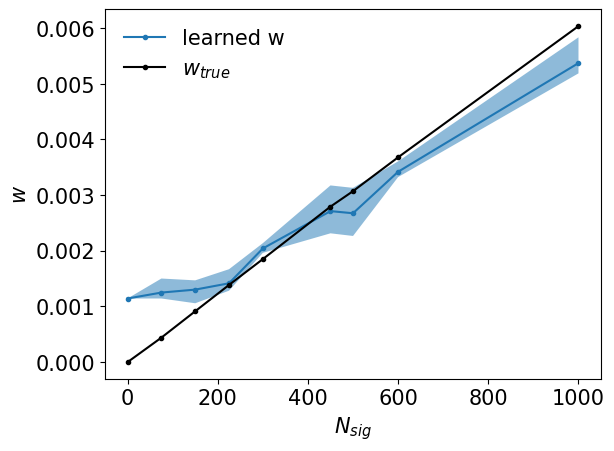

In [9]:
all_ws = w_all_try_sig[0][0]
all_ws = np.array(all_ws)

#all_ws = all_ws[all_ws>0.0001]
#w_sig_try_0 = 0.0009
#w_sig_try_16_0 = 0.00036
#w_sig_try_84_0 = 0.0014
#w_sig_std_try = []
#new_sig_list = [0,1000,600]
new_true_w = [0.006037,0.00368,0.003072,0.002794,0.001851,0.001387,0.000914,0.00044,0]

new_sig_list = [1000,600,500,450,300,225,150,75,0]

w_sig_ensembled_median = []
w_sig_ensembled_16_percentile = []
w_sig_ensembled_84_percentile = []

#pdf = matplotlib.backends.backend_pdf.PdfPages(f'./results/w_bounds.pdf')

for k,sig in enumerate(new_sig_list):
    w_sig_try = []
    w_sig_try_16_percentile = []
    w_sig_try_84_percentile = []
    for i in range(10):
        if sig == 0:
            if i!=0:
                continue
        all_ws = w_all_try_sig[sig][i]
        all_ws = np.array(all_ws)
      #  print(all_ws.shape)
        ws_cut = all_ws[all_ws>cuts[sig][i]]
    
        w_sig_try.append(np.mean(ws_cut))
       # w_sig_try_16_percentile.append(np.percentile(all_ws, 16))
       # w_sig_try_84_percentile.append(np.percentile(all_ws, 84))
     #   w_sig_std_try.append(np.std(w_all_try_sig[1000][i]))

    w_sig_try = np.array(w_sig_try)

    if sig == 0:
        w_sig_try_0 = w_sig_try

    w_sig_ensembled_median.append(np.median(w_sig_try))
    w_sig_ensembled_16_percentile.append(np.percentile(w_sig_try, 16))
    w_sig_ensembled_84_percentile.append(np.percentile(w_sig_try, 84))
   # w_sig_std_try = np.array(w_sig_std_try)

    
    
plt.plot(new_sig_list, w_sig_ensembled_median, label='learned w',marker='o',markersize=3)
plt.fill_between(new_sig_list, w_sig_ensembled_16_percentile, w_sig_ensembled_84_percentile, alpha=0.5)
plt.plot(new_sig_list, new_true_w, label=r'$w_{true}$',marker='o',markersize=3,color='black')
plt.legend(frameon=False,fontsize=15)
plt.xlabel(r'$N_{sig}$',fontsize=15)
plt.ylabel(r'$w$',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('./figures/m_data/w_vs_nsig.pdf',dpi=200,bbox_inches='tight')
plt.show()   
    

    


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
# import norm pdf
from scipy.stats import norm
from sklearn.cluster import DBSCAN
import matplotlib.backends.backend_pdf


#bins = np.linspace(0.000000001,0.01,1000)
bins = np.linspace(0.0001,0.01,50)
#bins = np.logspace(-10,-3, 100)
wsig_0 = w_all_try_sig[0][0]
wsig_0 = np.array(wsig_0)
wsig_log_0 = -np.log10(wsig_0)

#print(wsig_log_0.shape)


new_sig_list = [1000,600,500,450,300,225,150,75]

for sig in sig_list:
    
    w_dataset = []

   # if sig != 1000:
    #    continue
    if sig == 1000:
       cuts[sig] = 10**(-np.array([2.7,2.7,2.7,2.7,2.7,2.7,2.7,
                                   2.7,2.7,2.7]))
      #cuts[sig] = [0.0038,0.0032,0.003,0.003,0.0035,0.0038,
               #  0.004,0.003, 0.0036, 0.003]
    if sig == 600:
      cuts[sig] = 10**(-np.array([3.0,3.6,3.6,3.0,3.0,3.0,3.0,
                                  3.0,3.5,3.5 ]))
    if sig == 500:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
    if sig == 450:
      cuts[sig] = 10**(-np.array([3.3,3.3,3.3,3.3,3.3,3.3,3.3,
                                  3.3,3.3,4.0]))
    if sig == 300:
      cuts[sig] = 10**(-np.array([3.7,3.7,3.7,3.7,3.7,3.7,3.7,
                                  3.7,3.7,3.7 ]))
    if sig == 225:
      cuts[sig] = 10**(-np.array([4.0,4.0,4.0,4.0,4.0,4.0,4.0,
                                  4.0,4.0,4.0 ]))
    if sig == 150:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
    if sig == 75:
      cuts[sig] = 10**(-np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,
                                  4.0, 4.0, 4.0 ]))
      
    if sig == 0:
       cuts[sig] = 10**(-np.array([4.2]))
    #if sig == 225:
    #  cuts[sig] = 10**(-np.array([4.1,4.1,4.1,4.1,4.1,4.1,4.1,
       #                           4.1,4.1,4.1 ]))
    pdf = matplotlib.backends.backend_pdf.PdfPages(f'./results/w_hist_{sig}.pdf')
    for i in range(10):
        if sig ==0:
            if i!=0:
                continue
        wsig = w_all_try_sig[sig][i]
        wsig = np.array(wsig)

        wsig_log = -np.log10(wsig)


        # do a dbscan
       # db = DBSCAN(eps=0.3, min_samples=20).fit(wsig_log.reshape(-1,1))
       # labels = db.labels_

       # print(labels)
      #  clusters = np.unique(labels)

       # means = [np.mean(wsig[labels==cluster]) for cluster in clusters]
       # number_of_points = [len(wsig[labels==cluster]) for cluster in clusters]

       # max_mean = np.argmax(number_of_points)
       # max_mean_label = clusters[max_mean]

       # print(max_mean)


       # fraction = len(wsig[wsig>cuts[sig][i]])/len(wsig)
       # print(fraction)

       # print(wsig.shape)
        #print
      #  w_mean = []
       # for i in range(20):
        #    print((i+1)*10)
         #   w_mean.append(np.mean(wsig[i*10:i*10+1]))
        #wsig = wsig[wsig<0.0001]


      #  gmm = GaussianMixture(n_components=2, random_state=0).fit(wsig.reshape(-1,1))

       # means = np.array(gmm.means_).flatten()
       # cov = np.sqrt(gmm.covariances_).flatten()
       # weights = np.array(gmm.weights_).flatten()

       # pdf = weights[0]*norm.pdf(bins, means[0], cov[0]) + weights[1]*norm.pdf(bins, means[1], cov[1])


        #print(gmm.weights_)
       # print(means)

       # sample_0 = np.random.normal(means[0], cov[0], 50000)
       # sample_1 = np.random.normal(means[1], cov[1], 50000)
      #  kmeans = AffinityPropagation(max_iter=5000).fit(wsig.reshape(-1,1))

       # kmeans = KMeans(n_clusters=2, random_state=0).fit(wsig_log.reshape(-1,1))
       # labels = kmeans.labels_

       # centroids = kmeans.cluster_centers_
       # label = np.argmin(centroids)
        #print(centroids)

       # w_dataset.append(np.median(wsig[labels==0]))

       # print(np.unique(labels))
       # print(labels)

       # labels_1 = np.sum(labels)
       # labels_0 = len(labels) - labels_1

       # fraction = labels_1/len(labels)

       # if (fraction < 0.53) and (fraction > 0.47):
         #   print('unsuccessful trainings')
         #   continue


       # if labels_0 > labels_1:
         #   labels = 1 - labels

       # print(labels_1, labels_0)
       # print(kmeans.cluster_centers_)
      #  label = np.argmax(kmeans.cluster_centers_)

       # print(metrics.davies_bouldin_score(wsig.reshape(-1,1), labels))
        bins = np.linspace(2,9,60)

        plt.hist(wsig_log, bins=bins, label='learned w', histtype='step')
        plt.hist(wsig_log_0, bins=bins, label='no-signal', histtype='step')
     #   plt.hist(wsig_log[labels==label], bins=40, label='learned w', histtype='step')
       # plt.hist(wsig, bins=40, label='learned w', histtype='step')
       # plt.xscale('log')
       # plt.plot(bins, pdf, label='GMM')
        #plt.hist(sample_0, bins=40, label='gaussian_1', histtype='step',density=True)
       #plt.hist(sample_1, bins=40, label='gaussian_2', histtype='step',density=True)
       # plt.hist(wsig[labels==0], bins=40, label='learned w', histtype='step')
      #  plt.title(f'w = {np.median(wsig[labels==0])}')
        plt.title(f'Nsig = {sig}')
        plt.xlabel(r'$-\log_{10}(w)$')
        #plt.axvline(x=), color='r', linestyle='--', label='true w')
        plt.axvline(x=-np.log10(cuts[sig][i]), color='r', linestyle='--', label='true w')
        plt.legend(frameon=False)
       # plt.savefig(f'./results/w_hist_{sig}_dataset_{i}.pdf')
        pdf.savefig()
        plt.close()
    pdf.close()

[1 1 1 ... 1 1 1]


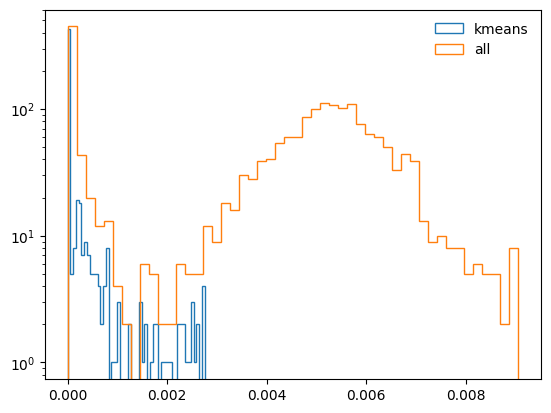

[1 1 0 ... 1 1 1]


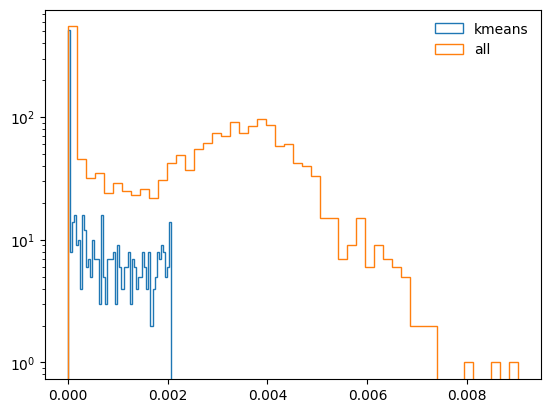

[0 0 0 ... 1 1 1]


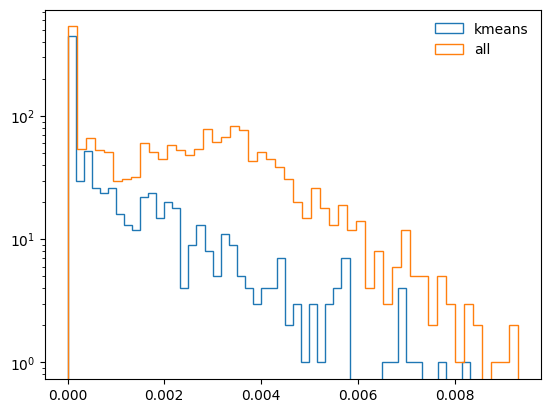

[1 1 1 ... 0 0 0]


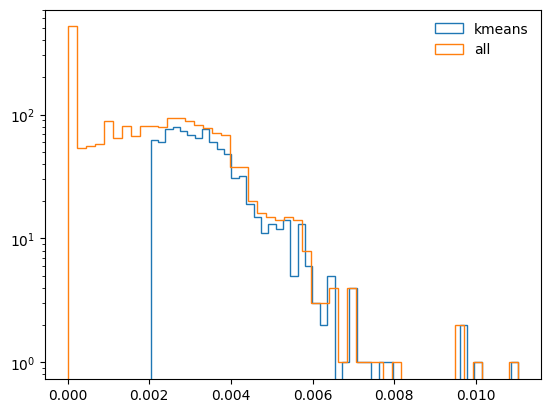

[0 0 1 ... 1 0 1]


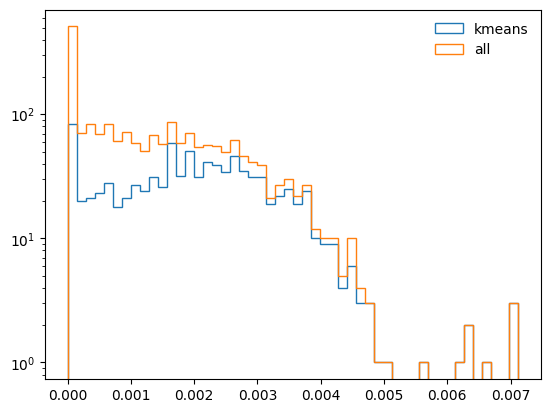

[0 0 0 ... 1 1 1]


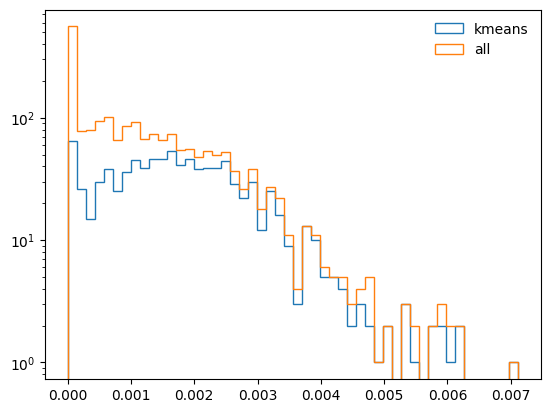

[1 0 0 ... 0 0 0]


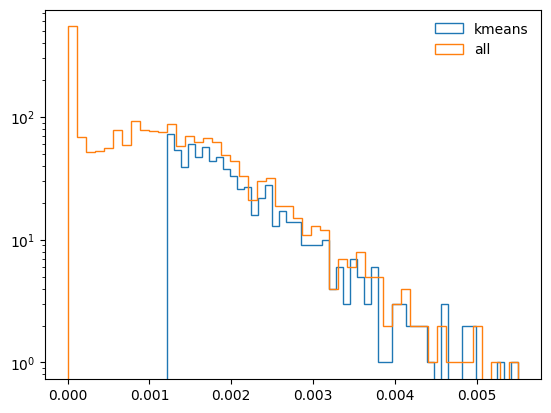

[1 1 1 ... 0 0 0]


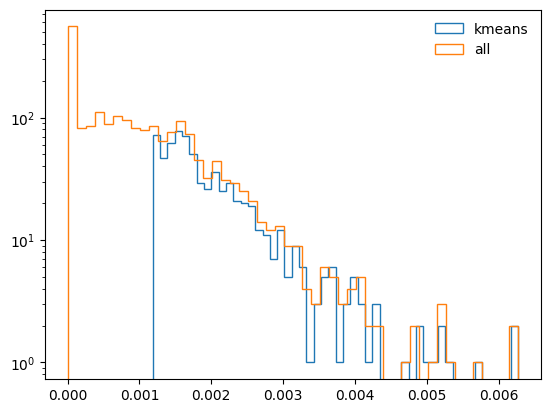

IndexError: boolean index did not match indexed array along dimension 0; dimension is 190 but corresponding boolean dimension is 2000

In [ ]:
# do k-means clustering on w_sig
from sklearn.cluster import KMeans
# do gmm clustering on w_sig
#from sklearn.mixture import GaussianMixture
labels_all = {}

bins = np.linspace(0,0.01,200)

w_sig_kmeans_1 = []
w_84_kmeans_1 = []
w_16_kmeans_1 = []

w_sig_kmeans_0 = []
w_84_kmeans_0 = []
w_16_kmeans_0 = []
#bins = np.logspace(-8,0,50)
#bins = np.linspace(4,20,50)
for sig in sig_list:
    w_sig = w_all_list[sig]

   # print(np.mean(w_sig))
    #kmeans = KMeans(n_clusters=2, random_state=0,max_iter=1000).fit(w_sig.reshape(-1,1))
   # if sig == 0:
      #  kmeans = KMeans(n_clusters=1, random_state=0,max_iter=1000).fit(w_sig.reshape(-1,1))

  #    gmm = GaussianMixture(n_components=1, random_state=0).fit(w_sig.reshape(-1,1))
    #else:
    kmeans = KMeans(n_clusters=2, random_state=0,max_iter=1000).fit(w_sig.reshape(-1,1))
 #     gmm = GaussianMixture(n_components=2, random_state=0).fit(w_sig.reshape(-1,1))
   # print(np.exp(-gmm.means_))
   # print(np.sqrt(gmm.covariances_))
   # print(kmeans.cluster_centers_)
    #label=np.argmax(kmeans.cluster_centers_)
   # label_0 = np.argmin(kmeans.cluster_centers_)
    labels = kmeans.labels_
    if sum(labels==1) > sum(labels==0):
      corrected_predictions = labels.copy()
      corrected_predictions[labels==1] = 0
      corrected_predictions[labels==0] = 1

    w_sig_kmeans_1.append(np.mean(w_sig[corrected_predictions==1]))
    w_84_kmeans_1.append(np.percentile(w_sig[corrected_predictions==1], 84))
    w_16_kmeans_1.append(np.percentile(w_sig[corrected_predictions==1], 16))

    w_sig_kmeans_0.append(np.mean(w_sig[corrected_predictions==0]))
    w_84_kmeans_0.append(np.percentile(w_sig[corrected_predictions==0], 84))
    w_16_kmeans_0.append(np.percentile(w_sig[corrected_predictions==0], 16))
   # w_std_kmeans.append(np.std(w_sig[labels==1]))

    labels_all[sig] = labels
    print(labels)
   # print(kmeans.cluster_centers_)
    if sig == 0:
        plt.hist(w_sig[corrected_predictions==1], bins=50, label='all', histtype='step')
    else:
      plt.hist(w_sig[corrected_predictions==1], bins=50, label='kmeans', histtype='step')
    #  plt.hist(w_sig[labels==0], bins=50, label='label 0', histtype='step')
  #  plt.hist(w_sig[labels==0], bins=50, label='label 0', histtype='step')
    plt.hist(w_sig, bins=50, label='all', histtype='step')
    plt.legend(frameon=False)
    plt.yscale('log')
  #  plt.xscale('log')
    plt.show()

In [ ]:
# do k-means clustering on w_sig
#from sklearn.cluster import KMeans
# do gmm clustering on w_sig
from sklearn.mixture import GaussianMixture

labels_all = {}

bins = np.linspace(0,0.01,200)

w_sig_kmeans_1 = []
w_84_kmeans_1 = []
w_16_kmeans_1 = []

w_sig_kmeans_0 = []
w_84_kmeans_0 = []
w_16_kmeans_0 = []
#bins = np.logspace(-8,0,50)
#bins = np.linspace(4,20,50)
for sig in sig_list:
    w_sig = w_all_list[sig]

   # print(np.mean(w_sig))
    #kmeans = KMeans(n_clusters=2, random_state=0,max_iter=1000).fit(w_sig.reshape(-1,1))
   # if sig == 0:
      #  kmeans = KMeans(n_clusters=1, random_state=0,max_iter=1000).fit(w_sig.reshape(-1,1))

  #    gmm = GaussianMixture(n_components=1, random_state=0).fit(w_sig.reshape(-1,1))
    #else:
   # kmeans = KMeans(n_clusters=2, random_state=0,max_iter=1000).fit(w_sig.reshape(-1,1))
    gmm = GaussianMixture(n_components=2).fit(w_sig.reshape(-1,1))
    print('for sig = ', sig)
    print(gmm.means_)
    print(np.sqrt(gmm.covariances_))
   # print(kmeans.cluster_centers_)
   # label=np.argmax(kmeans.cluster_centers_)
   # label_0 = np.argmin(kmeans.cluster_centers_)
  #  labels = kmeans.labels_
  #  w_sig_kmeans_1.append(np.mean(w_sig[labels==label]))
  #  w_84_kmeans_1.append(np.percentile(w_sig[labels==label], 84))
  #  w_16_kmeans_1.append(np.percentile(w_sig[labels==label], 16))

  #  w_sig_kmeans_0.append(np.mean(w_sig[labels==label_0]))
  #  w_84_kmeans_0.append(np.percentile(w_sig[labels==label_0], 84))
  #  w_16_kmeans_0.append(np.percentile(w_sig[labels==label_0], 16))
   # w_std_kmeans.append(np.std(w_sig[labels==1]))

  #  labels_all[sig] = labels
 #   print(labels)
   # print(kmeans.cluster_centers_)
  #  if sig == 0:
   #     plt.hist(w_sig[labels==label], bins=50, label='all', histtype='step')
   # else:
   #   plt.hist(w_sig[labels==label], bins=50, label='kmeans', histtype='step')
    #  plt.hist(w_sig[labels==0], bins=50, label='label 0', histtype='step')
  #  plt.hist(w_sig[labels==0], bins=50, label='label 0', histtype='step')
   # plt.hist(w_sig, bins=50, label='all', histtype='step')
   # plt.legend(frameon=False)
   # plt.yscale('log')
  #  plt.xscale('log')
   # plt.show()

for sig =  1000
[[0.00532566]
 [0.00015022]]
[[[0.00153795]]

 [[0.00108528]]]
for sig =  600
[[0.00164265]
 [0.00273581]]
[[[0.0019808 ]]

 [[0.00211089]]]
for sig =  500
[[0.00178853]
 [0.00278977]]
[[[0.0019875 ]]

 [[0.00239246]]]
for sig =  450
[[0.00171425]
 [0.00223071]]
[[[0.00182509]]

 [[0.00208893]]]
for sig =  300
[[0.00149651]
 [0.00128421]]
[[[0.00167492]]

 [[0.00157055]]]
for sig =  75
[[0.00090616]
 [0.00103047]]
[[[0.00135395]]

 [[0.00145084]]]
for sig =  0
[[0.00057116]
 [0.00055495]]
[[[0.00118505]]

 [[0.00117882]]]


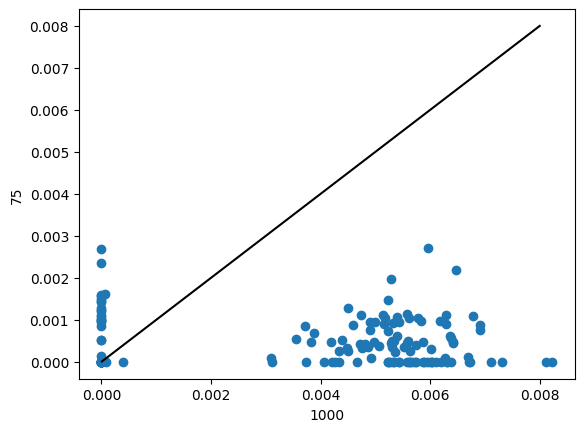

In [ ]:
plt.scatter(np.array(w_all_list[1000][0:150]) , np.array(w_all_list[0]))
#plt.scatter(np.array(w_all_list[1000]) , np.array(w_all_list[75]))
#plot y == x
plt.plot([0.00001,0.008],[0.00001,0.008], color='black')
plt.xlabel('1000')
plt.ylabel('75')
plt.savefig('./results/w_scatter.pdf')
plt.show()

In [ ]:
np.median(w_all_list[0])

0.00028550008500230814

In [ ]:
np.percentile(w_all_list[0],16), np.percentile(w_all_list[0],84)

(1.2894334034278648e-08, 0.0010475421572086459)

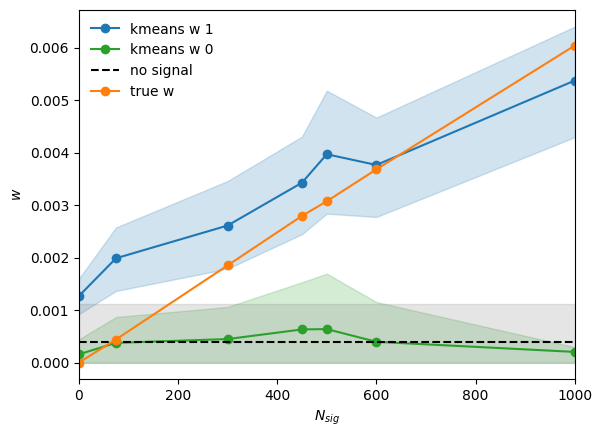

In [ ]:
plt.plot(sig_list, w_sig_kmeans_1, label='kmeans w 1',color='C0',marker='o')
plt.fill_between(sig_list, w_16_kmeans_1, w_84_kmeans_1, alpha=0.2, color='C0')
plt.plot(sig_list, w_sig_kmeans_0, label='kmeans w 0',color='C2',marker='o')
plt.fill_between(sig_list, w_16_kmeans_0, w_84_kmeans_0, alpha=0.2, color='C2')


plt.axhline(y=np.median(w_all_list[0]), color='black', linestyle='--', label='no signal')
plt.fill_between(sig_list, np.percentile(w_all_list[0],16), np.percentile(w_all_list[0],84), alpha=0.2, color='gray')
#plt.errorbar(sig_list, w_sig, yerr=w_sig_std, fmt='o',color='C0')
plt.plot(sig_list, true_w, label='true w',color='C1',marker='o')
#plt.errorbar(sig_list, true_w, yerr=true_w_std, fmt='o',color='C1') 
plt.xlabel(r'$N_{sig}$')
plt.ylabel(r'$w$')
plt.xlim(0,1000)
plt.legend(loc='upper left', frameon=False)
plt.savefig('results/w_kmeans.pdf')
plt.show()

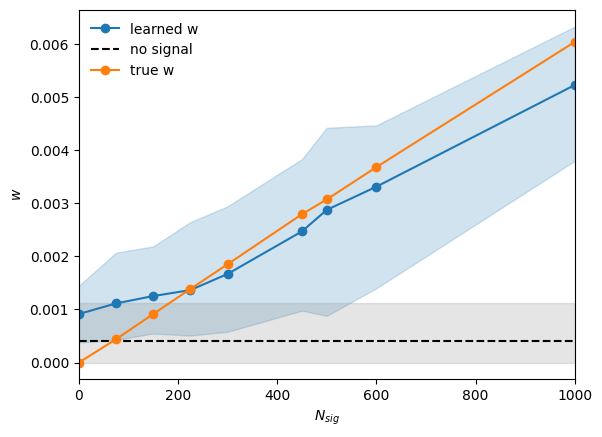

In [ ]:
plt.plot(sig_list, w_sig, label='learned w',color='C0',marker='o')
plt.fill_between(sig_list, w_sig_16_percentile, w_sig_84_percentile, alpha=0.2, color='C0')

plt.axhline(y=np.median(w_all_list[0]), color='black', linestyle='--', label='no signal')
plt.fill_between(sig_list, np.percentile(w_all_list[0],16), np.percentile(w_all_list[0],84), alpha=0.2, color='gray')
#plt.errorbar(sig_list, w_sig, yerr=w_sig_std, fmt='o',color='C0')
plt.plot(sig_list, true_w, label='true w',color='C1',marker='o')
#plt.errorbar(sig_list, true_w, yerr=true_w_std, fmt='o',color='C1') 
plt.xlabel(r'$N_{sig}$')
plt.ylabel(r'$w$')
plt.xlim(0,1000)
plt.legend(loc='upper left', frameon=False)
plt.savefig('results/w.pdf')
plt.show()

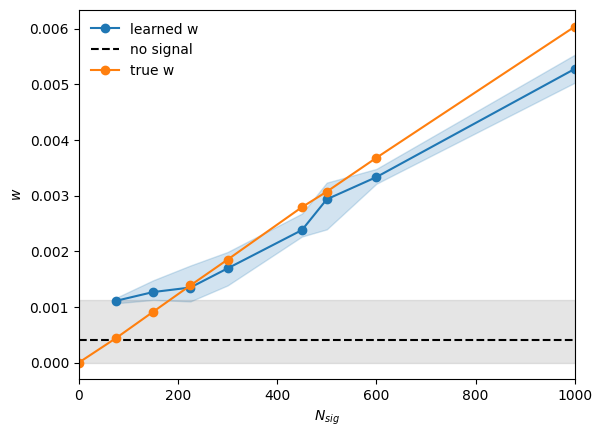

In [ ]:
plt.plot(new_sig_list, w_sig_ensembled_median, label='learned w',color='C0',marker='o')
plt.fill_between(new_sig_list, w_sig_ensembled_16_percentile, w_sig_ensembled_84_percentile, alpha=0.2, color='C0')

plt.axhline(y=np.median(w_all_list[0]), color='black', linestyle='--', label='no signal')
plt.fill_between(sig_list, np.percentile(w_all_list[0],16), np.percentile(w_all_list[0],84), alpha=0.2, color='gray')
#plt.errorbar(sig_list, w_sig, yerr=w_sig_std, fmt='o',color='C0')
plt.plot(sig_list, true_w, label='true w',color='C1',marker='o')
#plt.errorbar(sig_list, true_w, yerr=true_w_std, fmt='o',color='C1') 
plt.xlabel(r'$N_{sig}$')
plt.ylabel(r'$w$')
plt.xlim(0,1000)
plt.legend(loc='upper left', frameon=False)
plt.savefig('results/w.pdf')
plt.show()

In [ ]:
# do k-means clustering on w_sig
#from sklearn.cluster import KMeans
# do gmm clustering on w_sig
from sklearn.mixture import GaussianMixture

labels_all = {}

bins = np.linspace(0,0.01,200)


w_mean = []
w_std = []

#bins = np.logspace(-8,0,50)
#bins = np.linspace(4,20,50)
for k,sig in enumerate(sig_list):
    w_plot = w_all_list[sig]
    w_plot = np.array(w_plot)
    w_plot = w_plot[w_plot>cut[k]]

    print('for sig = ', sig)
 #  print(np.mean(w_sig))
  #  print(np.std(w_sig))
    w_mean.append(np.mean(w_plot))
    w_std.append(np.std(w_sig))

w_mean = np.array(w_mean)
w_std = np.array(w_std)

for sig =  1000
for sig =  600
for sig =  500
for sig =  450
for sig =  300
for sig =  75
for sig =  0


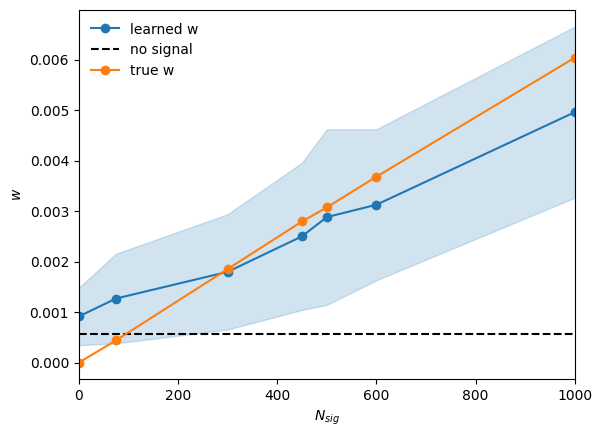

In [ ]:
plt.plot(sig_list, w_mean, label='learned w',color='C0',marker='o')
plt.fill_between(sig_list, w_mean-w_std, w_mean+w_std, alpha=0.2, color='C0')

plt.axhline(y=np.mean(w_all_list[0]), color='black', linestyle='--', label='no signal')
#plt.fill_between(sig_list, np.percentile(w_all_list[0],16), np.percentile(w_all_list[0],84), alpha=0.2, color='gray')
#plt.errorbar(sig_list, w_sig, yerr=w_sig_std, fmt='o',color='C0')
plt.plot(sig_list, true_w, label='true w',color='C1',marker='o')
#plt.errorbar(sig_list, true_w, yerr=true_w_std, fmt='o',color='C1') 
plt.xlabel(r'$N_{sig}$')
plt.ylabel(r'$w$')
plt.xlim(0,1000)
plt.legend(loc='upper left', frameon=False)
plt.savefig('results/w_means.pdf')
plt.show()